# Welcome to an example Binder

We need `seaborn`, which shall be included it in `requirements.txt` file

# HeadBrain
## Sebastian Arrivillaga A00826656

# Preguntas 
## 1. ¿Existen muchos outliers de los datos en los niños de 1-2 años? 
## 2. ¿Como es su comportamiento?
## 3. ¿Tiene relación el tamaño de la cabeza de un bebe, con el peso de su cerebro? 
## 4. ¿Cómo es la relación, perfecto, buena, no muy buena o muy mala?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Importamos las librerias y base de datos a utilizar.

In [2]:
df = pd.read_csv('datasets/headbrain.csv') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [3]:
df.head(20)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [4]:
df.tail(20)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
217,2,2,3170,1178
218,2,2,3268,1142
219,2,2,3389,1130
220,2,2,3381,1185
221,2,2,2864,1012
222,2,2,3740,1280
223,2,2,3479,1103
224,2,2,3647,1408
225,2,2,3716,1300
226,2,2,3284,1246


In [5]:
df.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

### Diagrama de caja que muestra la serie de datos a través de sus cuartiles

## Respondemos a la pregunta, ¿Existen muchos outliers de los datos en los niños de 1-2 años? 

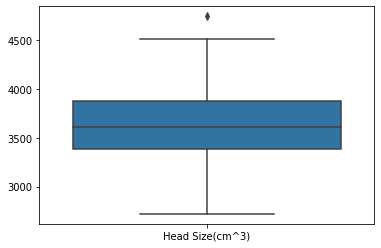

<Figure size 720x360 with 0 Axes>

In [6]:
sns.boxplot(data = df.loc[:,['Head Size(cm^3)']])
plt.figure(figsize = (10,5))
sns.set(font_scale=1.75)

plt.show()

Respuesta = Podemos observar que el tamaño de la cabeza de los niños, no tiene muchos outliers, solo 1 valor atípico.

## Respondemos a la pregunta, ¿Existen muchos outliers de los datos en los niños de 1-2 años? 

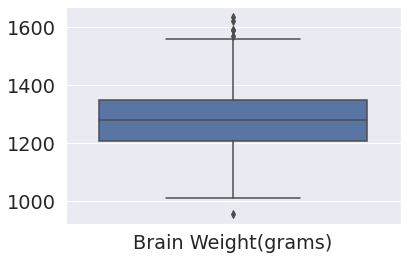

<Figure size 720x360 with 0 Axes>

In [7]:
sns.boxplot(data = df.loc[:,['Brain Weight(grams)']])
plt.figure(figsize = (10,5))
sns.set(font_scale=1.75)

plt.show()

Respuesta = Podemos observar que el peso del cerebro de los niños, si tiene muchos outliers, por encima del maximo se encuentran muchos valores atípicos, al igual que existe 1, abajo del minimo. 

### Histograma que representa la frecuencia de la serie de datos según el tamaño de la cabeza de niños. 
#### Tomando en cuenta que la superficie de cada barra es proporcional a la frecuencia de los valores representados

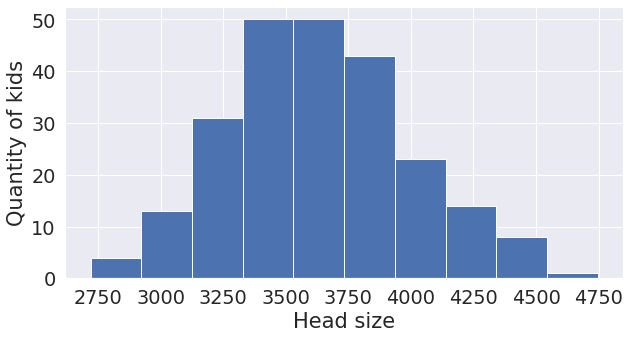

In [8]:
plt.figure(figsize = (10,5))
sns.set(font_scale=1.75)
plt.hist(df['Head Size(cm^3)'],bins=10) 
plt.ylabel('Quantity of kids') 
plt.xlabel('Head size')

plt.show()

## Respondemos a la pregunta ¿Como es su comportamiento?
Podemos concluir que el promedio del tamaño de la cabeza en los niños, se encuentra entre 3250 y 3750. Esto ya que son las frecuencias con mayor numero.

### Histograma que representa la frecuencia de la serie de datos según el peso del cerebrode los niños. 
#### Tomando en cuenta que la superficie de cada barra es proporcional a la frecuencia de los valores representados

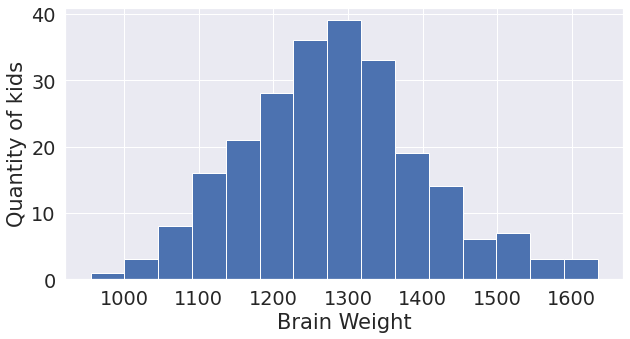

In [9]:
plt.figure(figsize = (10,5))
sns.set(font_scale=1.75)
plt.hist(df['Brain Weight(grams)'],bins=15) 
plt.ylabel('Quantity of kids') 
plt.xlabel('Brain Weight')

plt.show()

## Respondemos a la pregunta ¿Como es su comportamiento?
 Podemos concluir que el promedio del peso del cerebro en los niños, se encuentra entre 1200 y 1400. Esto ya que son las frecuencias con mayor numero.

# Diagrama de Regresion

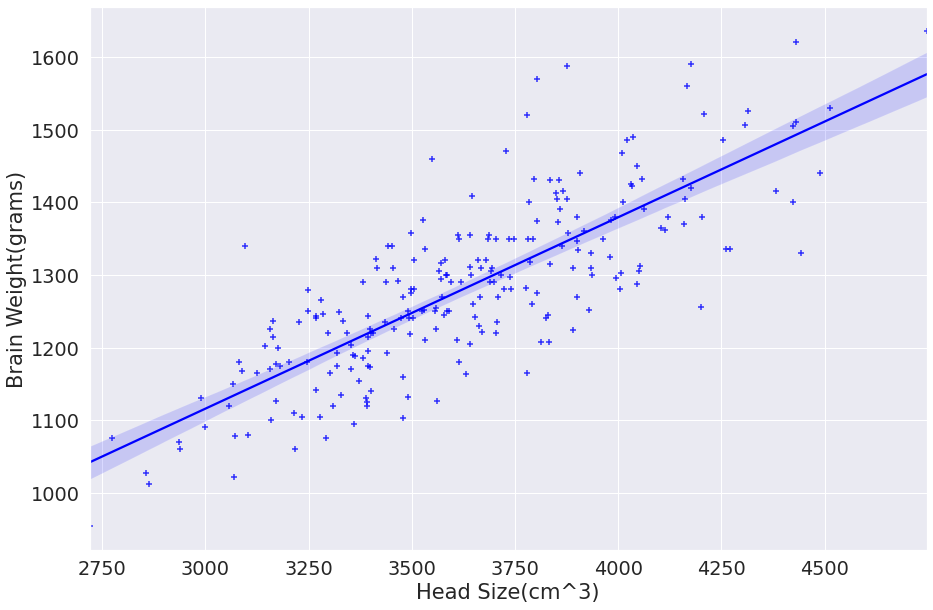

In [10]:
plt.figure(figsize=(15, 10))

sns.regplot(x='Head Size(cm^3)', 
            y='Brain Weight(grams)', 
            data=df, 
            color='blue', 
            marker='+')

plt.show()

## Respondemos a la pregunta ¿Tiene relación el tamaño de la cabeza de un bebe, con el peso de su cerebro? 
 Podemos ver en la grafica, al ojo, que existe una relacion entre ambas variables muy fuertes, por lo que una variable tiene impacto sobre la otra.

#### Base que sirve para generar modelo de regresion lineal
###### Head Size(cm^3) = (Brain Weight(grams))*b1 + b0

In [12]:
from sklearn import linear_model 

lm = linear_model.LinearRegression()

X = pd.DataFrame(df['Head Size(cm^3)'])
Y = pd.DataFrame(df['Brain Weight(grams)'])

model_lm = lm.fit(X, Y)
model_lm

print('El intercepto es \t :\t', model_lm.intercept_)
print('Los coeficientes son \t : \t', model_lm.coef_)
print('Puntuación del modelo (R^2) es: ', model_lm.score(X, Y))

El intercepto es 	 :	 [325.57342105]
Los coeficientes son 	 : 	 [[0.26342934]]
Puntuación del modelo (R^2) es:  0.639311719957


## Respondemos a la pregunta ¿Cómo es la relación, perfecto, buena, no muy buena o muy mala?
 La correlacion es de 0.6393, lo cual la clasifica como Muy buena, pero no muy fuerte, como se observa en la imagen siguiente.